###  Import required modules and load data file

In [45]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
fruits=pd.read_table('fruit_data_with_colors.txt')
fruits.head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  


,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


In [75]:
from matplotlib import cm
x=fruits[['height','width','mass','color_score']]
y=fruits['fruit_label']
x_train,x_test,y_train,y_test=x[:50],x[50:],y[:50],y[50:]

In [76]:
x_test.head(2)

,height,width,mass,color_score
50,8.2,6.0,130,0.71
51,7.5,6.0,116,0.72


In [77]:
y_test.head(2)

50    4
51    4
Name: fruit_label, dtype: int64

In [78]:
x=fruits[['height','width','mass']]
y=fruits['fruit_label']
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0)

In [79]:
x_train.head(10)

,height,width,mass
42,7.2,7.2,154
48,10.1,7.3,174
7,4.0,5.8,76
14,7.3,7.6,152
32,7.0,7.2,164
49,8.7,5.8,132
29,7.4,7.0,160
37,7.3,7.3,154
56,8.1,5.9,116
18,7.1,7.5,162


###  Create classifier object

In [80]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5)

### Train the classifier (fit the estimator)using the training data

In [81]:
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [82]:
y_test.head(5)

26    3
35    3
43    4
28    3
11    1
Name: fruit_label, dtype: int64

In [83]:
fruit_prediction=knn.predict([[362,9.6,9.2]])
fruit_prediction

array([2], dtype=int64)

In [84]:
fruit_prediction=knn.predict([[362,9.6,9.2],[176,7.4,7.2]])
fruit_prediction

array([2, 2], dtype=int64)

In [85]:
fruit_prediction=knn.predict([[152,7.3,7.6]])
fruit_prediction

array([2], dtype=int64)

In [86]:
names={1:'Apple',2:'mandrain',3:'orange',4:'lemon'}
for each in fruit_prediction:
    print(names[each])

mandrain


In [69]:
knm.score(x_test,y_test)

0.5333333333333333

In [94]:
k_range=range(1,20)
scores=[]
for k in k_range:
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train,y_train)
    scores.append(knn.score(x_test,y_test))

In [95]:
scores

[0.6,
 0.5333333333333333,
 0.5333333333333333,
 0.5333333333333333,
 0.5333333333333333,
 0.5333333333333333,
 0.5333333333333333,
 0.4666666666666667,
 0.5333333333333333,
 0.3333333333333333,
 0.3333333333333333,
 0.3333333333333333,
 0.26666666666666666,
 0.3333333333333333,
 0.26666666666666666,
 0.26666666666666666,
 0.26666666666666666,
 0.26666666666666666,
 0.26666666666666666]

<IPython.core.display.Javascript object>


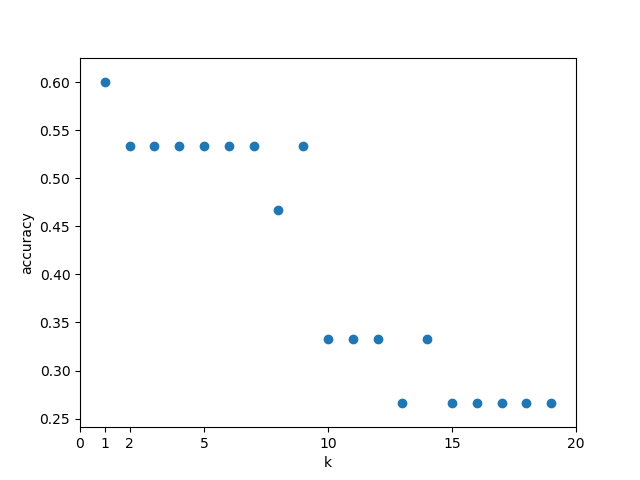

([<matplotlib.axis.XTick at 0x25192252748>,
 <a list of 7 Text xticklabel objects>)

In [96]:
plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range,scores)
plt.xticks([0,1,2,5,10,15,20])